In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\machine-learning-coursera\Exercise2'))
	print(os.getcwd())
except:
	pass

In [2]:
from IPython import get_ipython

 # Programming Exercise 2: Logistic Regression

In [3]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
get_ipython().run_line_magic('matplotlib', 'inline')


 ## 1 Logistic Regression

 In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
 you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
 decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [4]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]


 ### 1.1 Visualizing the data

In [5]:
def plotData(X, y):
    """
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 0], X[pos, 1], 'b*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'o', mfc='y', ms=8, mec='k', mew=1)
    
    # ============================================================

In [6]:
# Now, we call the implemented function to display the loaded data:


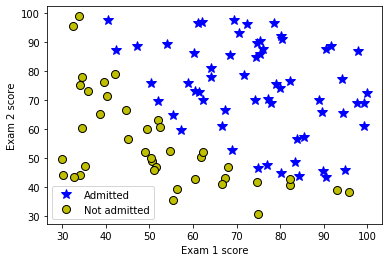

In [7]:
plotData(X, y)
# add axes labels

pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
pass

 <a id="section1"></a>
 ### 1.2 Implementation

 #### 1.2.1 Warmup exercise: sigmoid function

 Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

 $$ h_\theta(x) = g(\theta^T x)$$

 where function $g$ is the sigmoid function. The sigmoid function is defined as:

 $$g(z) = \frac{1}{1+e^{-z}}$$.


In [8]:
def sigmoid(z):
    """
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
   
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1/(1+np.exp(-z))

    # =============================================================
    return g

 The following cell evaluates the sigmoid function at `z=0`. You should get a value of 0.5.

In [9]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


 <a id="section2"></a>
 #### 1.2.2 Cost function and gradient

In [10]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

 Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

 $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

 and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
 element (for $j = 0, 1, \cdots , n$) is defined as follows:

 $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [11]:
def costFunction(theta, X, y):
    """    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    m = y.size  # number of training examples

    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    
    h = sigmoid(np.dot(theta,np.transpose(X)))

    J = (1/m)*np.sum((np.dot(-y,np.log(h)))-(np.dot((1-y),np.log(1-h))))

    for i in range(0,grad.size):
        grad[i] = (1/m)*np.sum(np.dot((h-y),X[:,i]))
    
    # =============================================================
    return J, grad

 Test cases for  $\theta$:

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


 #### 1.2.3 Learning parameters using `scipy.optimize`

 This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy is a numerical computing library for `python`. It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

 You are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values).

In [13]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


 We want to use the final value for $\theta$ to visualize the decision boundary on the training data.

In [14]:

def plotDecisionBoundary(plotData, theta, X, y):
    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)
    
    # Only need 2 points to define a line, so choose two endpoints
    x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])

    # Decision boundary occurs when h = 0, or when
    # theta0 + theta1*x1 + theta2*x2 = 0
    # y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)
    y_boundary = (-1/theta[2])*(theta[0]+theta[1]*x_boundary)

    pyplot.plot(x_boundary, y_boundary, 'r-')

    # Legend
    pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
    pyplot.xlim([30, 100])
    pyplot.ylim([30, 100])

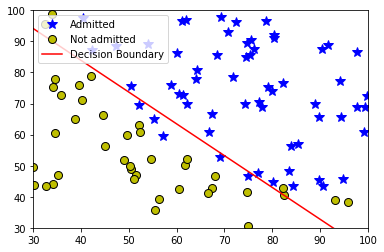

In [15]:
# Plot Boundary
plotDecisionBoundary(plotData, theta, X, y)

 <a id="section4"></a>
 #### 1.2.4 Evaluating logistic regression

 After learning the parameters, you can use the model to predict whether a particular student will be admitted.
 Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.
 <a id="predict"></a>

In [16]:
def predict(theta, X):
    """
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(X, theta))
    for i in range (0,h.size):
        if h[i] >= 0.5:
            p[i] = 1
        else: 
            p[i] = 0

    # ============================================================
    return p

 After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [17]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


 ## 2 Regularized logistic regression

 In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
 Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [18]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

 ### 2.1 Visualize the data

 Similar to the previous parts of this exercise, `plotData` is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
 different markers.

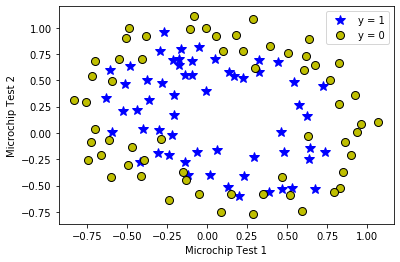

In [19]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

 The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

 ### 2.2 Feature mapping

 One way to fit the data better is to create more features from each data point. In the function `mapFeature` defined in the file `utils.py`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

 $$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

 As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
 While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [20]:
# this function was given in the homework
def mapFeature(X1, X2, degree=6):

    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [21]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:, 0], X[:, 1])

 <a id="section5"></a>
 ### 2.3 Cost function and gradient

 Now you will implement code to compute the cost function and gradient for regularized logistic regression.

 Recall that the regularized cost function in logistic regression is

 $$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

 Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

 $$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

 $$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
 <a id="costFunctionReg"></a>

In [22]:
def costFunctionReg(theta, X, y, lambda_):
    """    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(theta,np.transpose(X)))

    J = (1/m)*np.sum((np.dot(-y,np.log(h)))-(np.dot((1-y),np.log(1-h))))+(lambda_/(2*m))*np.dot(theta,np.transpose(theta))

    for i in range(0,grad.size):
        if i == 0:
            grad[i] = (1/m)*np.sum(np.dot((h-y),X[:,i]))
        else:
           grad[i] = (1/m)*np.sum(np.dot((h-y),X[:,i]))+(lambda_/m)*theta[i] 

    # =============================================================
    return J, grad

In [23]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.21
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


 #### 2.3.1 Learning parameters using `scipy.optimize.minimize`

In [24]:
def OptimizeMinimizeReg(X,y,initial_theta,lambda_):
    # set options for optimize.minimize
    options= {'maxiter': 400}

    res = optimize.minimize(costFunctionReg,
                            initial_theta,
                            (X, y, lambda_),
                            jac=True,
                            method='TNC',
                            options=options)

    # the fun property of `OptimizeResult` object returns
    # the value of costFunction at optimized theta
    cost = res.fun

    # the optimized theta is in the x property
    theta = res.x

    return cost, theta

 ### 2.4 Plotting the decision boundary

In [25]:
def plotBoundary(X,y,initial_theta,lambda_):
    
    # Plot Data 
    plotData(X[:, 1:3], y)

    # calculating cost and theta
    cost, theta = OptimizeMinimizeReg(X, y, initial_theta, lambda_)

    # the grid 
    xgrid = np.linspace(-1, 1.5, 50)
    ygrid = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((xgrid.size, ygrid.size))

    # evaluating hypotesis over z
    for i in range(xgrid.size):
        for j in range(ygrid.size):
            featuresij = mapFeature(np.array([xgrid[i]]),np.array([ygrid[j]]))
            z[i][j] = np.dot (featuresij, theta)

    z = np.transpose(z)
    pyplot.contour( xgrid, ygrid, z, [0], linewidths=2, colors='r')
    pyplot.xlabel('Microchip Test 1')
    pyplot.ylabel('Microchip Test 2')
    pyplot.legend(['y = 1', 'y = 0'])
    pyplot.grid(False)
    pyplot.title('lambda = %0.2f' % lambda_)

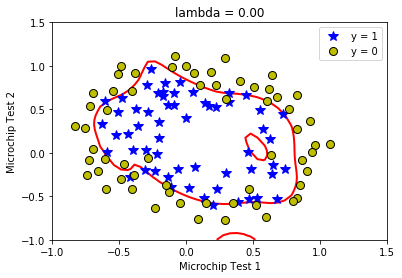

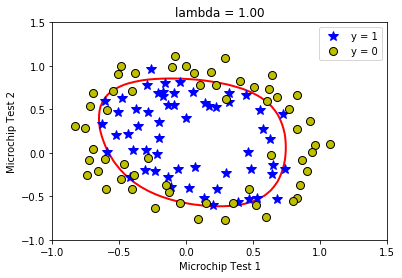

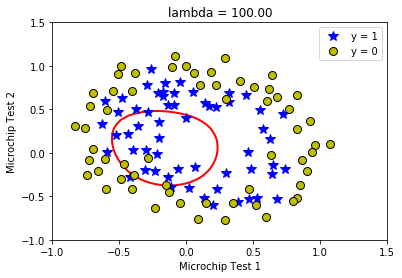

In [26]:
# Plotting for multiple lambda values

lambda_zero = 0
initial_theta = np.zeros(X.shape[1])
plotBoundary(X, y, initial_theta, lambda_zero)

lambda_one = 1
initial_theta = np.zeros(X.shape[1])
plotBoundary(X, y, initial_theta, lambda_one)

lambda_hundred = 100
initial_theta = np.zeros(X.shape[1])
plotBoundary(X, y, initial_theta, lambda_hundred)

 It shows overfitting for lambda = 0 and too much regularization (underfitting) for lambda = 100